In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [3]:
file='/shared/obs/sw/era40/e4moda.an.sfc.t85.swvl1.1957-2002.nc'
ds_soil=xr.open_dataset(file)
ds_soil=ds_soil['SWVL1']*100
ds_soil

<xarray.DataArray 'SWVL1' (time: 540, lat: 128, lon: 256)>
array([[[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0. 

In [4]:
ds_soil=ds_soil.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))
ds_soil

<xarray.DataArray 'SWVL1' (time: 248, lat: 128, lon: 256)>
array([[[ 2.5240326e+01,  2.5239563e+01,  2.5238800e+01, ...,
          2.5244141e+01,  2.5242615e+01,  2.5241852e+01],
        [ 2.5238037e+01,  2.5236511e+01,  2.5234985e+01, ...,
          2.5251007e+01,  2.5246429e+01,  2.5242615e+01],
        [ 2.5190735e+01,  2.5189972e+01,  2.5189972e+01, ...,
          2.5205994e+01,  2.5200653e+01,  2.5195312e+01],
        ...,
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21],
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21],
        [-2.3699742e-21, -2.3699742e-21, -2.3699742e-21, ...,
         -2.3699742e-21, -2.3699742e-21, -2.3699742e-21]],

       [[ 2.5214386e+01,  2.5213623e+01,  2.5212860e+01, ...,
          2.5216675e+01,  2.5215912e+01,  2.5215149e+01],
        [ 2.5212097e+01,  2.5211334e+01,  2.5210571e+01, ...,
          2.5222015e+01,

In [5]:
ds_nino34=ds_nino34.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 248)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2002-08-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [6]:
ds_climo=ds_soil.groupby('time.month').mean()
ds_anoms=ds_soil.groupby('time.month')-ds_climo
ds_anoms

<xarray.DataArray 'SWVL1' (time: 248, lat: 128, lon: 256)>
array([[[15.881665 , 15.880902 , 15.880139 , ..., 15.88548  ,
         15.883954 , 15.883191 ],
        [15.879376 , 15.877851 , 15.876325 , ..., 15.892346 ,
         15.887769 , 15.883954 ],
        [15.832074 , 15.831311 , 15.831311 , ..., 15.847333 ,
         15.841992 , 15.836652 ],
        ...,
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ],
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ],
        [-9.358661 , -9.358661 , -9.358661 , ..., -9.358661 ,
         -9.358661 , -9.358661 ]],

       [[15.795466 , 15.7947035, 15.793941 , ..., 15.797755 ,
         15.796992 , 15.796229 ],
        [15.793178 , 15.792415 , 15.791652 , ..., 15.803096 ,
         15.800044 , 15.796992 ],
        [15.7565565, 15.7565565, 15.7565565, ..., 15.768764 ,
         15.764949 , 15.760371 ],
        ...,
        [-9.41892  , -9.41892  , -9.41892  , ...,

In [7]:
from scipy.stats import linregress

In [8]:
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
m_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        
        m,b,r,p,e = linregress(ds_nino34['sst'],ds_anoms[:,j,i])
        
        m_array[j,i]=m
        r_array[j,i]=r
        p_array[j,i]=p

In [9]:
mask_sig=np.where(p_array<0.05,m_array,np.nan)

Text(0.5, 1.0, 'Regression between Nino3.4 and Soil Moisture Layer 1 Anomalies')

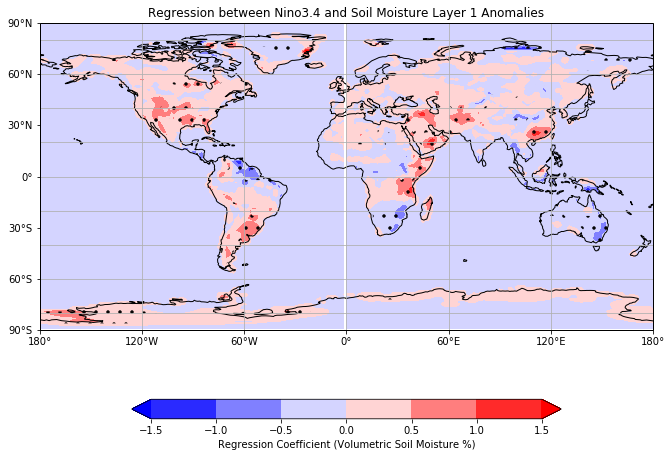

In [10]:
# clevs=np.arange(-3,3.25,0.25)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data=m_array
# data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
# mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(ds_anoms['lon'],ds_anoms['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(ds_anoms['lon'],ds_anoms['lat'],mask_sig,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Volumetric Soil Moisture %)')

# Add title
plt.title('Regression between Nino3.4 and Soil Moisture Layer 1 Anomalies')